In [1]:
import cv2
import pickle
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.models import load_model
from keras.layers import Dropout, Flatten, Dense
from keras import optimizers
from keras.applications import vgg19, inception_v3, resnet50
from sklearn.model_selection import train_test_split

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
num_classes = 40
epochs = 1
batch_size = 12

# Data preprocessing

**NOTE:** Do not repickle unless needed

In [ ]:
raw = [cv2.imread(x) for x in glob("data/train/*")]
raw

In [ ]:
def transform(img):
    canvas = np.full((800,800,3), (255, 255, 255), np.uint8)
    while(img.shape[0] > 800 or img.shape[1] > 800):
        img = cv2.resize(img, (img.shape[0]//2, img.shape[1]//2))
    canvas[:img.shape[0], :img.shape[1]] = img
    return canvas
x = np.array([transform(i) for i in raw])
del raw
pickle.dump(x, open("transformed.pkl", "wb"), protocol=4)

In [9]:
x = pickle.load(open("transformed.pkl", 'rb'))

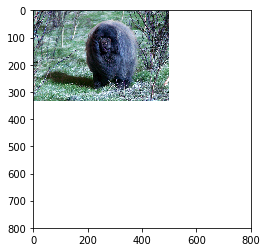

In [10]:
plt.imshow(x[0])

In [11]:
df = pd.read_csv("data/train.csv")
df.head()

,breedID,speciesID,fname,breed_name
0,23,2,0,newfoundland
1,35,2,1,staffordshire bull terrier
2,19,2,2,keeshond
3,2,2,3,american bulldog
4,29,2,4,saint bernard


In [15]:
train_names = [x[11:][:-4] for x in glob("data/train/*")]
y = np.array([df["breedID"][int(i)] for i in train_names])
y

array([23, 35,  5, ..., 30, 28,  4], dtype=int64)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
del x

MemoryError: 

In [18]:
del model

# Loading and training model

In [14]:
model = load_model("vgg19.h5")

C:\Anaconda\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
opt = optimizers.SGD(lr=0.001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(x_test, y_test))